In [1]:
!pip install plotly-express
#!pip install shapely

You should consider upgrading via the 'c:\users\gahty\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
pip list

Package                Version
---------------------- ---------
argon2-cffi            21.3.0
argon2-cffi-bindings   21.2.0
asgiref                3.5.1
asttokens              2.0.5
atomicwrites           1.4.0
attrs                  21.4.0
backcall               0.2.0
beautifulsoup4         4.10.0
bleach                 4.1.0
certifi                2021.10.8
cffi                   1.15.0
charset-normalizer     2.0.11
click                  8.0.1
colorama               0.4.4
cryptography           36.0.1
cycler                 0.11.0
debugpy                1.5.1
decorator              5.1.1
defusedxml             0.7.1
Django                 4.0.4
entrypoints            0.4
executing              0.8.3
fonttools              4.29.1
geographiclib          1.52
idna                   3.3
iniconfig              1.1.1
ipykernel              6.9.2
ipython                8.1.1
ipython-genutils       0.2.0
ipywidgets             7.6.5
jedi                   0.18.1
Jinja2                 3.0.3

You should consider upgrading via the 'c:\users\gahty\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


jupyter-console        6.4.3
jupyter-core           4.9.2
jupyterlab-pygments    0.1.2
jupyterlab-widgets     1.0.2
kiwisolver             1.3.2
llvmlite               0.38.0
MarkupSafe             2.1.1
matplotlib             3.5.1
matplotlib-inline      0.1.3
mistune                0.8.4
mysql-connector-python 8.0.26
nbclient               0.5.13
nbconvert              6.4.4
nbformat               5.2.0
nest-asyncio           1.5.4
networkx               2.8
nltk                   3.6.3
notebook               6.4.10
numba                  0.55.1
numpy                  1.21.2
packaging              21.3
pandas                 1.4.1
pandocfilters          1.5.0
parso                  0.8.3
patsy                  0.5.2
pickleshare            0.7.5
Pillow                 9.0.1
pip                    21.1.3
plotly                 5.6.0
plotly-express         0.4.1
pluggy                 1.0.0
prometheus-client      0.13.1
prompt-toolkit         3.0.28
psutil                 5.9.0
pure-eva

## 0. Preperations

In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import typing
import seaborn as sns
import project as p
import plotly.express as px
import scipy.stats as stats

### 0.1 Load Data

In [4]:
# Read Lending Club loan data into pd.Dataframe
p.file_exist(['loans_full_schema.csv'])
loans = pd.read_csv('loans_full_schema.csv')

Examine existence of data files:
File loans_full_schema.csv exists.


### 0.2 Data Exploration

In [5]:
# Display information about the loans data
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [6]:
# Display the first 10 records
loans.head(10)

emp_title  emp_length state homeownership  annual_income  \
0  global config engineer          3.0    NJ      MORTGAGE        90000.0   
1   warehouse office clerk        10.0    HI          RENT        40000.0   
2                 assembly         3.0    WI          RENT        40000.0   
3         customer service         1.0    PA          RENT        30000.0   
4     security supervisor         10.0    CA          RENT        35000.0   
5                      NaN         NaN    KY           OWN        34000.0   
6                      hr         10.0    MI      MORTGAGE        35000.0   
7                   police        10.0    AZ      MORTGAGE       110000.0   
8                    parts        10.0    NV      MORTGAGE        65000.0   
9               4th person         3.0    IL          RENT        30000.0   

   verified_income  debt_to_income  annual_income_joint  \
0         Verified           18.01                  NaN   
1     Not Verified            5.04                  NaN   
2  Source Verified           21.15                  NaN   
3     Not Verified           10.16                  NaN   
4         Verified           57.96              57000.0   
5     Not Verified            6.46                  NaN   
6  Source Verified           23.66             155000.0   
7  Source Verified           16.19                  NaN   
8  Source Verified           36.48                  NaN   
9     Not Verified           18.91                  NaN   

  verification_income_joint  debt_to_income_joint  ...  sub_grade  \
0                       NaN                   NaN  ...         C3   
1                       NaN                   NaN  ...         C1   
2                       NaN                   NaN  ...         D1   
3                       NaN                   NaN  ...         A3   
4                  Verified                 37.66  ...         C3   
5                       NaN                   NaN  ...         A3   
6              Not Verified                 13.12  ...         C2   
7                       NaN                   NaN  ...         B5   
8                       NaN                   NaN  ...         C2   
9                       NaN                   NaN  ...         A3   

   issue_month  loan_status  initial_listing_status  disbursement_method  \
0       18-Mar      Current                   whole                 Cash   
1       18-Feb      Current                   whole                 Cash   
2       18-Feb      Current              fractional                 Cash   
3       18-Jan      Current                   whole                 Cash   
4       18-Mar      Current                   whole                 Cash   
5       18-Jan      Current                   whole                 Cash   
6       18-Jan      Current                   whole                 Cash   
7       18-Jan      Current                   whole                 Cash   
8       18-Feb      Current                   whole                 Cash   
9       18-Mar      Current              fractional                 Cash   

    balance  paid_total  paid_principal  paid_interest  paid_late_fees  
0  27015.86     1999.33          984.14        1015.19             0.0  
1   4651.37      499.12          348.63         150.49             0.0  
2   1824.63      281.80          175.37         106.43             0.0  
3  18853.26     3312.89         2746.74         566.15             0.0  
4  21430.15     2324.65         1569.85         754.80             0.0  
5   4256.71      873.13          743.29         129.84             0.0  
6  22560.00     2730.51         1440.00        1290.51             0.0  
7  19005.39     1765.84          994.61         771.23             0.0  
8  18156.66     2703.22         1843.34         859.88             0.0  
9   6077.13      391.15          322.87          68.28             0.0  

[10 rows x 57 columns]

### 0.3 Summarize statistics - Numeric columns

In [7]:
loans.describe()

emp_length  annual_income  debt_to_income  annual_income_joint  \
count  9183.000000   1.000000e+04     9976.000000         1.495000e+03   
mean      5.930306   7.922215e+04       19.308192         1.279146e+05   
std       3.703734   6.473429e+04       15.004851         7.016838e+04   
min       0.000000   0.000000e+00        0.000000         1.920000e+04   
25%       2.000000   4.500000e+04       11.057500         8.683350e+04   
50%       6.000000   6.500000e+04       17.570000         1.130000e+05   
75%      10.000000   9.500000e+04       25.002500         1.515455e+05   
max      10.000000   2.300000e+06      469.090000         1.100000e+06   

       debt_to_income_joint    delinq_2y  months_since_last_delinq  \
count           1495.000000  10000.00000               4342.000000   
mean              19.979304      0.21600                 36.760709   
std                8.054781      0.68366                 21.634939   
min                0.320000      0.00000                  1.000000   
25%               14.160000      0.00000                 19.000000   
50%               19.720000      0.00000                 34.000000   
75%               25.500000      0.00000                 53.000000   
max               39.980000     13.00000                118.000000   

       earliest_credit_line  inquiries_last_12m  total_credit_lines  ...  \
count           10000.00000         10000.00000        10000.000000  ...   
mean             2001.29000             1.95820           22.679600  ...   
std                 7.79551             2.38013           11.885439  ...   
min              1963.00000             0.00000            2.000000  ...   
25%              1997.00000             0.00000           14.000000  ...   
50%              2003.00000             1.00000           21.000000  ...   
75%              2006.00000             3.00000           29.000000  ...   
max              2015.00000            29.00000           87.000000  ...   

        loan_amount            ttl          term  interest_rate   installment  \
count  10000.000000   10000.000000  10000.000000   10000.000000  10000.000000   
mean   16361.922500   67410.985600     43.272000      12.427524    476.205323   
std    10301.956759   56963.371117     11.029877       5.001105    294.851627   
min     1000.000000    1262.000000     36.000000       5.310000     30.750000   
25%     8000.000000   32205.500000     36.000000       9.430000    256.040000   
50%    14500.000000   53518.500000     36.000000      11.980000    398.420000   
75%    24000.000000   84806.000000     60.000000      15.050000    644.690000   
max    40000.000000  982456.000000     60.000000      30.940000   1566.590000   

            balance    paid_total  paid_principal  paid_interest  \
count  10000.000000  10000.000000    10000.000000   10000.000000   
mean   14458.916610   2494.234773     1894.448466     599.666781   
std     9964.561865   3958.230365     3884.407175     517.328062   
min        0.000000      0.000000        0.000000       0.000000   
25%     6679.065000    928.700000      587.100000     221.757500   
50%    12379.495000   1563.300000      984.990000     446.140000   
75%    20690.182500   2616.005000     1694.555000     825.420000   
max    40000.000000  41630.443680    40000.000000    4216.440000   

       paid_late_fees  
count    10000.000000  
mean         0.119516  
std          1.813468  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max         52.980000  

[8 rows x 43 columns]

### 0.4 Summarize statistics - Categorical columns

#### 0.4.1 Term (36 or 60 months)

In [8]:
loans['term'].value_counts()

36    6970
60    3030
Name: term, dtype: int64

#### 0.4.2 Grade (of credit)

In [9]:
loans['grade'].value_counts()

B    3037
C    2653
A    2459
D    1446
E     335
F      58
G      12
Name: grade, dtype: int64

#### 0.4.3 Sub_grade (Detailed grade of credit)

In [10]:
loans['sub_grade'].value_counts()

B1    647
B2    638
B5    631
C1    597
B4    581
C2    572
A4    568
B3    540
A3    504
C4    503
C3    501
A5    485
C5    480
A2    480
A1    422
D2    323
D1    319
D3    311
D5    262
D4    231
E5     91
E4     73
E3     73
E2     57
E1     41
F1     31
G1     11
F3      9
F2      9
F4      5
F5      4
G4      1
Name: sub_grade, dtype: int64

#### 0.4.4 Emp_length (Length of Employement)

In [11]:
loans['emp_length'].value_counts()

10.0    3332
2.0      967
3.0      862
0.0      690
1.0      685
5.0      645
4.0      611
6.0      404
7.0      368
9.0      312
8.0      307
Name: emp_length, dtype: int64

#### 0.4.5 Homeownership

In [12]:
loans['homeownership'].value_counts()

MORTGAGE    4789
RENT        3858
OWN         1353
Name: homeownership, dtype: int64

#### 0.4.6 Loan_purpose (purpose for this loan)

In [13]:
loans['loan_purpose'].value_counts()

debt_consolidation    5144
credit_card           2249
other                  914
home_improvement       680
major_purchase         303
medical                162
house                  151
car                    131
small_business         125
moving                  69
vacation                62
renewable_energy        10
Name: loan_purpose, dtype: int64

#### 0.4.7 Loan_status (status of the loan)

In [14]:
loans['loan_status'].value_counts()

Current               9375
Fully Paid             447
In Grace Period         67
Late (31-120 days)      66
Late (16-30 days)       38
Charged Off              7
Name: loan_status, dtype: int64

## 1. Preprocessing

In [15]:
# Categorize loan records into 3 types: Current, Good, Bad, and insert column to tag their status
loans, finished_loans = p.loan_categorize(loans=loans)

C:\Users\gahty\PycharmProjects\2022Spring_Finals\project.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loans = good_loans.append(bad_loans)
C:\Users\gahty\PycharmProjects\2022Spring_Finals\project.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loans = loans.append(current_loans)
C:\Users\gahty\PycharmProjects\2022Spring_Finals\project.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finished_loans = good_loans.append(bad_loans)


In [16]:
# Value count of column loan_category
loans['loan_category'].value_counts()

Current Loans    9480
Good Loans        447
Bad Loans          73
Name: loan_category, dtype: int64

## 2. Exploratory Analysis

In [17]:
# Initialize a color map for following analysis
color_map = {"Good Loans": "b", "Bad Loans": ".85"}

### 2.1 Data Distribution among Groups

#### 2.1.1 Interest rate

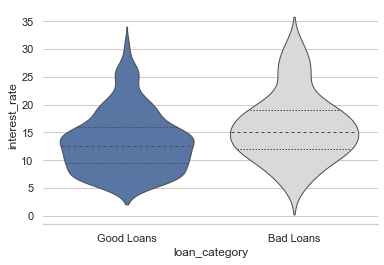

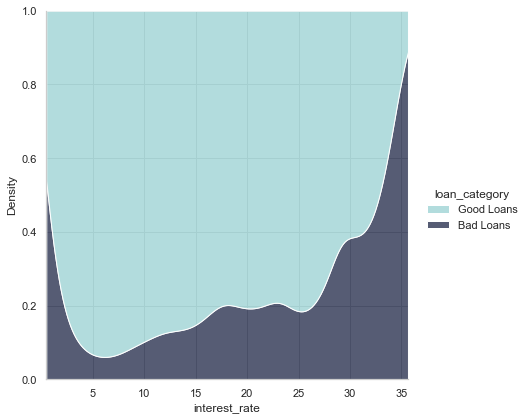

In [18]:
p.vis_dis_comparison(data=finished_loans, independent="interest_rate", category="loan_category", palette=color_map)
p.vis_dis_cummu(data=finished_loans, independent="interest_rate", category="loan_category")

#### 2.1.2 Loan Amount

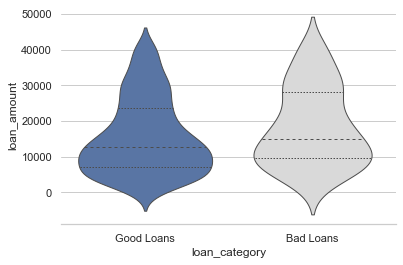

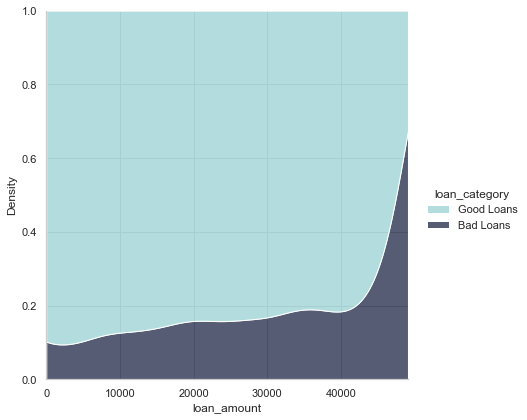

In [19]:
p.vis_dis_comparison(data=finished_loans, independent="loan_amount", category="loan_category", palette=color_map)
p.vis_dis_cummu(data=finished_loans, independent="loan_amount", category="loan_category")

#### 2.1.3 Monthly Installment

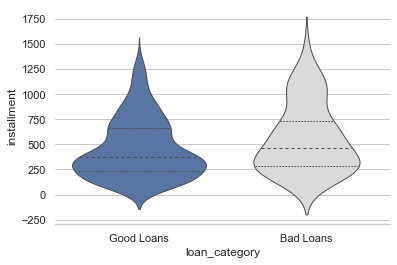

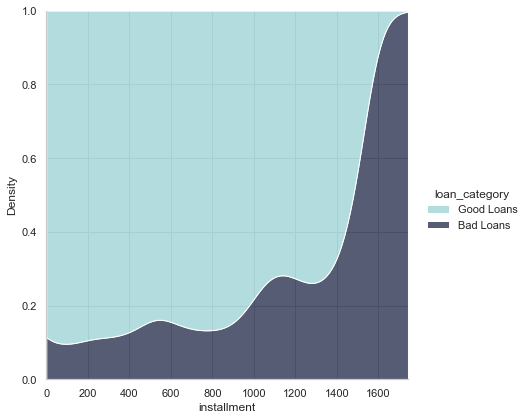

In [20]:
p.vis_dis_comparison(data=finished_loans, independent="installment", category="loan_category", palette=color_map)
p.vis_dis_cummu(data=finished_loans, independent="installment", category="loan_category")

### 2.2 Data Distribution (Multi-dimensional)

#### 2.2.1 Terms

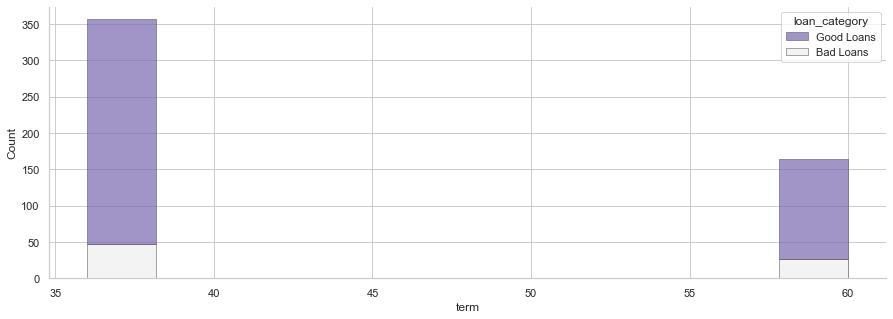

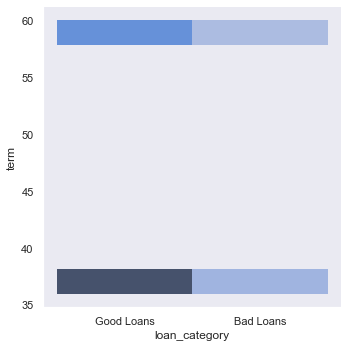

In [21]:
p.plot_counts(data=finished_loans, x='term', category='loan_category')
p.plot_dis(data=finished_loans, x='loan_category', y='term')

#### 2.2.2 Sub_grade (Detailed Credit Grades)

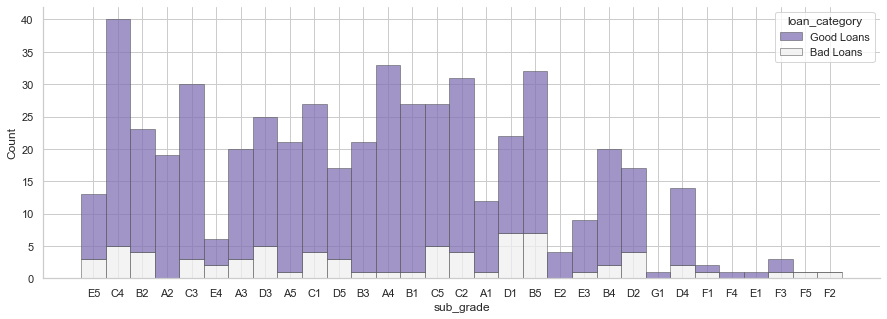

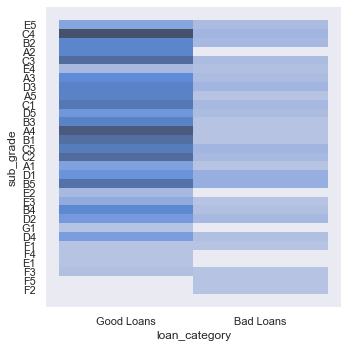

In [22]:
p.plot_counts(data=finished_loans, x='sub_grade', category='loan_category')
p.plot_dis(data=finished_loans, x='loan_category', y='sub_grade')

#### 2.2.3 Length of Employment

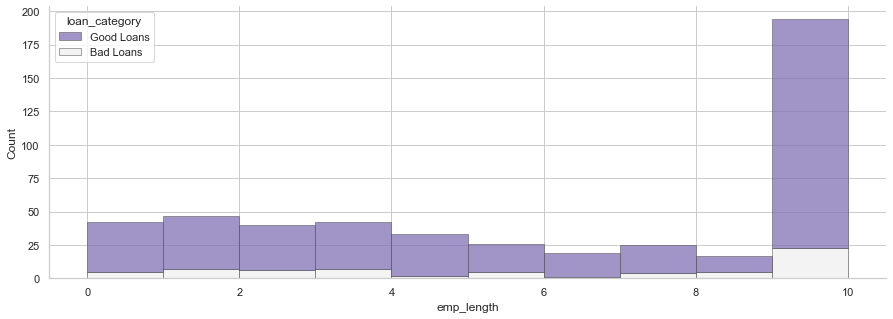

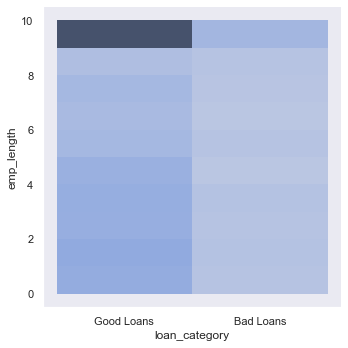

In [23]:
p.plot_counts(data=finished_loans, x='emp_length', category='loan_category')
p.plot_dis(data=finished_loans, x='loan_category', y='emp_length')

#### 2.2.4 Purpose of Loan

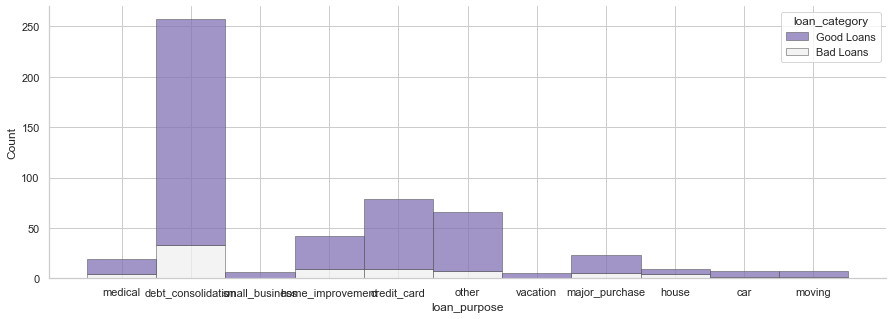

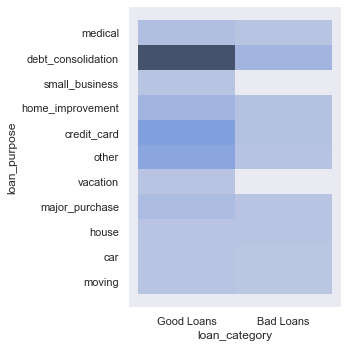

In [24]:
p.plot_counts(data=finished_loans, x='loan_purpose', category='loan_category')
p.plot_dis(data=finished_loans, x='loan_category', y='loan_purpose')

### 2.3 Geographical Data Distribution

#### 2.3.1 Percentage of "Good Loan"

In [25]:
loans = finished_loans

In [26]:
counts = loans[['state', 'loan_category']].value_counts().rename_axis(['state', 'loan_category']).reset_index(name='b_count')
bad_count = counts[counts['loan_category']=='Bad Loans']
bad_count = bad_count[['state', 'b_count']]
total_count = loans['state'].value_counts().rename_axis('state').reset_index(name='t_count')
bad_count.info()
total_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 8 to 66
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   state    25 non-null     object
 1   b_count  25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 600.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   state    45 non-null     object
 1   t_count  45 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 848.0+ bytes


In [27]:
bad_count.set_index('state', inplace=True)
total_count.set_index('state', inplace=True)

result = pd.concat([bad_count, total_count], axis=1, sort=True)
result = result.fillna(0)

In [28]:
result['%GoodLoan'] = result.apply(lambda x: 1 - x['b_count']/x['t_count'], axis=1)
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, AK to WY
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   b_count    45 non-null     float64
 1   t_count    45 non-null     int64  
 2   %GoodLoan  45 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.4+ KB


In [29]:
import plotly.express as px

In [30]:
result = result.reset_index(drop=False)

In [31]:
# Visualization
p.geo_dist_usa(data=result, loc_col='state', vis_col='%GoodLoan')

In [32]:
result['%BadLoan'] = result.apply(lambda x: x['b_count']/x['t_count'], axis=1)
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      45 non-null     object 
 1   b_count    45 non-null     float64
 2   t_count    45 non-null     int64  
 3   %GoodLoan  45 non-null     float64
 4   %BadLoan   45 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.9+ KB


In [33]:
p.geo_dist_usa(data=result, loc_col='state', vis_col='%BadLoan')

#### 2.3.2 Loans Per User

In [34]:
means = loans['loan_amount'].groupby(loans['state']).mean().rename_axis(['state']).reset_index(name='mean')
means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   45 non-null     object 
 1   mean    45 non-null     float64
dtypes: float64(1), object(1)
memory usage: 848.0+ bytes


In [35]:
means.describe()

mean
count     45.000000
mean   14748.133095
std     4391.353260
min     3000.000000
25%    13000.000000
50%    14860.365854
75%    17590.526316
max    25666.666667

In [36]:
p.geo_dist_usa(data=means, loc_col='state', vis_col='mean')

### Hypothesis 1: The borrowers using Lending Club have worse economic situations than borrowers from all other lending resources

To explore whether and to what extent the above findings on good debt and bad debt can be generalized to other general borrowing channels, our team wanted to explore the differences in economic status between those who borrow at lending club and other general borrowers. We assumed that borrowers in lending club would be worse off than other general borrowers and selected income, debt, and income to debt ratio as measures.
We used data from Survey of Consumer Finances in 2010 and 2019 as sample of general borrowers by filtering data points with debt. We also adjusted the effect of inflation on data in 2019 based on Consumer Price Index(CPI).

data source: https://www.federalreserve.gov/econres/scf_2010.htm#EXCELDATEX  
detailed description: https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbkx01.htm#1.HEADING  
cpi source: https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-

In [37]:
#load data
scfp2010 = pd.read_csv("SCFP2010.csv")
scfp2019 = pd.read_csv("SCFP2019.csv")
loan = pd.read_csv("loans_full_schema.csv")
# filter people who have debt
scfp2010 = p.filter_debt(scfp2010)
scfp2019 = p.filter_debt(scfp2019)
# group by case id
scfp2010_byCase = p.group_by_case(scfp2010)
scfp2019_byCase = p.de_inflation(p.group_by_case(scfp2019))
#sample data
scfp2019_byCase

INCOME      DEBT  DEBT2INC   deinf_INCOME     deinf_DEBT  \
YY1                                                                     
2      38484.856680   13920.0  0.361557   32825.761603   11873.101291   
3     104866.143860     250.0  0.002384   89445.858333     213.238170   
4     124210.383990  388900.0  3.130978  105945.579774  331713.296832   
5      29729.042725     680.0  0.022877   25357.466634     580.007822   
6      27489.183342   14054.0  0.511256   23446.972573   11987.396950   
...             ...       ...       ...            ...            ...   
5809    3481.963223     738.0  0.216294    2969.949859     629.479077   
5810   52534.883721   10400.0  0.198101   44809.769806    8870.707861   
5811  356748.512710  774000.0  2.169600  304289.599617  660185.373485   
5812   91630.611142  400000.0  4.384220   78156.575245  341181.071568   
5813  406839.913466   46800.0  0.115013  347015.194083   39918.185373   

      deinf_DEBT2INC  
YY1                   
2           0.361557  
3           0.002384  
4           3.130978  
5           0.022877  
6           0.511256  
...              ...  
5809        0.216294  
5810        0.198101  
5811        2.169600  
5812        4.384220  
5813        0.115013  

[4273 rows x 6 columns]

### compare income

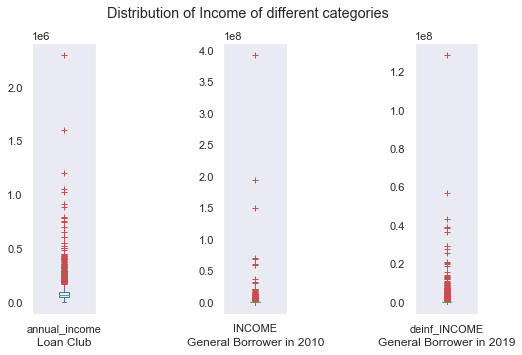

In [38]:
loan_Income=loan["annual_income"]
scfp2010_Income = scfp2010_byCase["INCOME"]
scfp2019_Income = scfp2019_byCase["deinf_INCOME"]
p.draw_outliers([loan_Income, scfp2010_Income, scfp2019_Income], 'Distribution of Income of different categories')

Since there were too many outliers in the sample, making the total income range very large, we filtered the group with annual income less than 200,000 to obtain more significant visualization results. We will conduct a separate analysis later for those with incomes greater than 200,000.

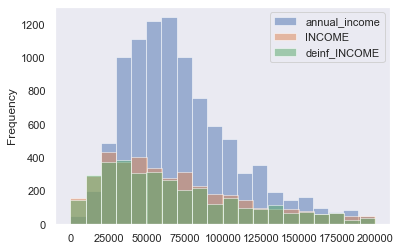

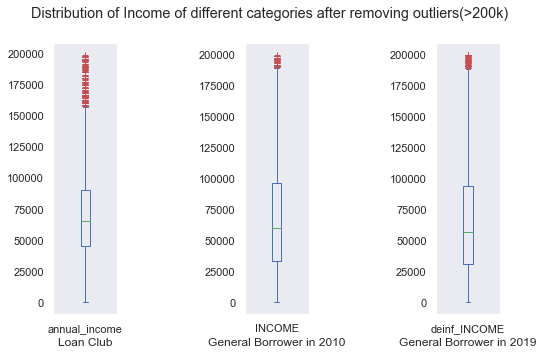

In [39]:
income_remove_outlier=p.remove_outlier([loan_Income, scfp2010_Income,scfp2019_Income], 200000)
p.draw_outliers(income_remove_outlier, 'Distribution of Income of different categories after removing outliers(>200k)')

When high income is removed, we can see that the main annual income ranges of these three groups are very close to each other. However, the main center of distribution for those who borrowed at lending club is located in the range of 25k-75k, while the center of income distribution for the general borrower is more to the left, around 25k. This seems to be inconsistent with our hypothesis.

In [40]:
bins=[0,25000,50000,75000,100000,125000,150000, 175000, 200000,np.inf]  
labels=["<25k","25k-50k","50k-75k","75k-100k","100k-125k","125k-150k", "150k-175k", "175k-200k", ">200k"]
rename_map={"annual_income":"loan_club", "INCOME": "scfp2010", "deinf_INCOME":"scfp2019"}
income_ratio = p.calculate_concat_ratio(loan_Income, scfp2010_Income, scfp2019_Income, bins, labels, rename_map, True)
income_ratio

loan_club  scfp2010  scfp2019
50k-75k     0.293275  0.166277  0.161716
25k-50k     0.267616  0.210717  0.212400
75k-100k    0.177107  0.119711  0.108204
100k-125k   0.090909  0.077185  0.068835
<25k        0.051318  0.129917  0.136256
125k-150k   0.049013  0.051244  0.053041
>200k       0.028666  0.180736  0.197784
150k-175k   0.023354  0.035509  0.040311
175k-200k   0.018743  0.028705  0.021452

<AxesSubplot:title={'center':'The proportion of annual income in each category'}>

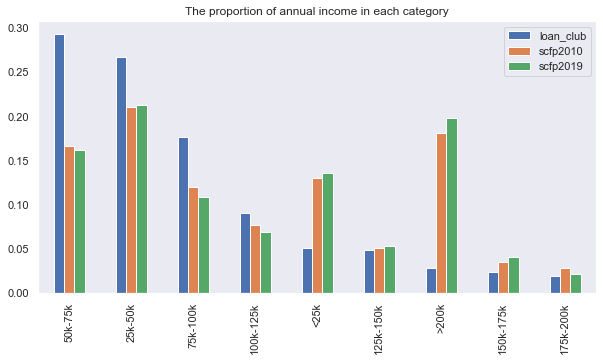

In [41]:
income_ratio.plot(kind="bar", title="The proportion of annual income in each category", figsize=(10, 5))

Since the numbers of data points of the three categories are not the same, we manually calssified the income range into 9 categories and calculated the proportion of annual income in each category respectively. According to the above chart, we can see that lending club has a higher percentage of income in the range of 25k-100k than general. And besides 0-25k, the general borrowers also show a peak at income > 200k, at which range the lending club users have a very few proportion.

### compare debt

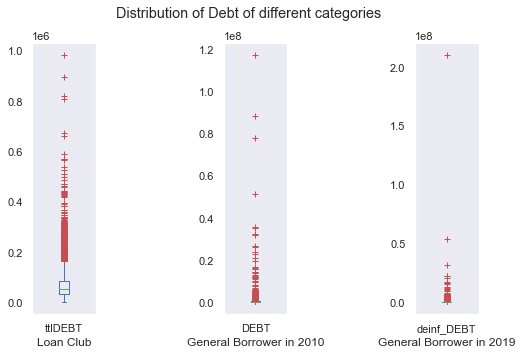

In [42]:
loan["ttlDEBT"]=loan["total_credit_utilized"]+loan["loan_amount"]
loan_debt=loan["ttlDEBT"]
scfp2010_debt = scfp2010_byCase["DEBT"]
scfp2019_debt = scfp2019_byCase["deinf_DEBT"]
p.draw_outliers([loan_debt, scfp2010_debt, scfp2019_debt], 'Distribution of Debt of different categories')

Again, we filtered the group with annual income less than 200,000 to obtain more significant visualization results. 

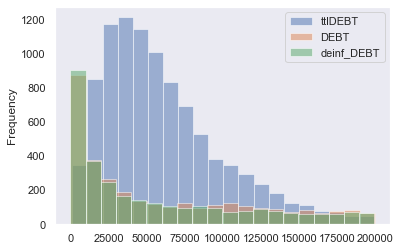

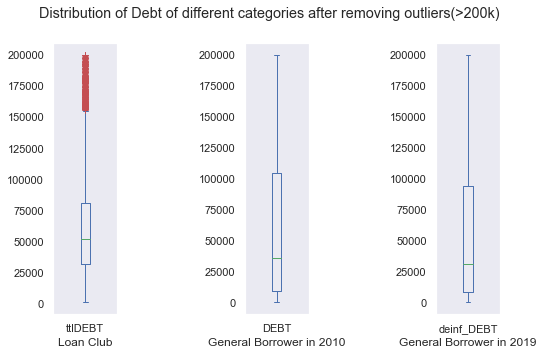

In [43]:
debt_remove_outlier=p.remove_outlier([loan_debt, scfp2010_debt,scfp2019_debt], 200000)
p.draw_outliers(debt_remove_outlier, 'Distribution of Debt of different categories after removing outliers(>200k)')

We used the sum of total credit utilized and the loan amoount authorized through lending club as the total debt of lending club users. When high debt is removed, we can see that the upper boundary of lending club is much lower than other two categories, approximately at 75k. And the lower boundary of lending club is higher, at about 25k. While the lower boundaries of other two are more close to 10k.  

In [44]:
bins=[0,25000,50000,75000,100000,125000,150000, 175000, 200000,np.inf]  
labels=["<25k","25k-50k","50k-75k","75k-100k","100k-125k","125k-150k", "150k-175k", "175k-200k", ">200k"]
rename_map={"ttlDEBT":"loan_club", "DEBT": "scfp2010", "deinf_DEBT":"scfp2019"}
debt_ratio = p.calculate_concat_ratio(loan_debt, scfp2010_debt, scfp2019_debt, bins, labels, rename_map, True)
debt_ratio

loan_club  scfp2010  scfp2019
25k-50k       0.2998  0.092321  0.099228
50k-75k       0.2252  0.059169  0.064592
<25k          0.1634  0.294377  0.330447
75k-100k      0.1268  0.056022  0.059911
100k-125k     0.0785  0.057281  0.044933
125k-150k     0.0415  0.044901  0.044699
>200k         0.0294  0.316198  0.281301
150k-175k     0.0224  0.038187  0.038615
175k-200k     0.0130  0.041544  0.036274

<AxesSubplot:title={'center':'The proportion of debt in each category'}>

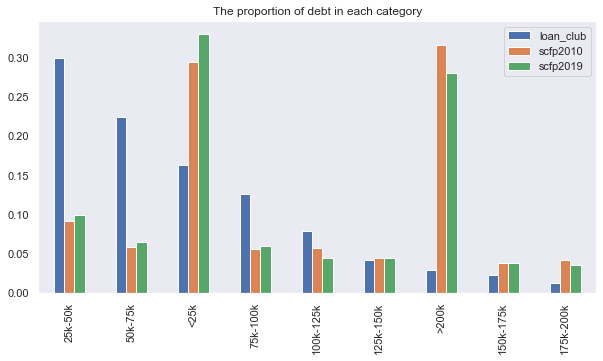

In [45]:
debt_ratio.plot(kind="bar", title="The proportion of debt in each category", figsize=(10, 5))

While looking at the proportion of debt balance in each category, we can see that lending club has a higher percentage of debt in the range of 25k-75k. And general borrower's debt peak are mainly at 0-25k and > 200k.Lending club has a higher debt  amount proportion than general, beside the amount value greater than 200k.

According to the above analysis, we find the similiar distribution between debt and income. So we come to a new assumption, is there any relationship between income and debt? Is it possible that richer people will be more likely to borrow large amounts?

<AxesSubplot:title={'center':'The relation between annual income and debt balance(both < 200000)'}, xlabel='deinf_INCOME', ylabel='deinf_DEBT'>

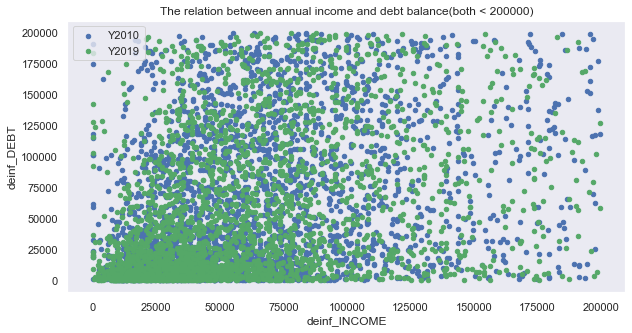

In [46]:
ax = scfp2010_byCase[(scfp2010_byCase["INCOME"]<200000) & (scfp2010_byCase["DEBT"]<200000)].plot.scatter(x='INCOME', y='DEBT', color='b', label='Y2010', figsize=(10, 5), title='The relation between annual income and debt balance(both < 200000)')
scfp2019_byCase[(scfp2019_byCase["deinf_INCOME"]<200000) & (scfp2019_byCase["deinf_DEBT"]<200000)].plot.scatter(x='deinf_INCOME', y='deinf_DEBT', color='g', label='Y2019',ax=ax, figsize=(10, 5))

<AxesSubplot:title={'center':'The relation between annual income and debt balance(200k-4000k)'}, xlabel='deinf_INCOME', ylabel='deinf_DEBT'>

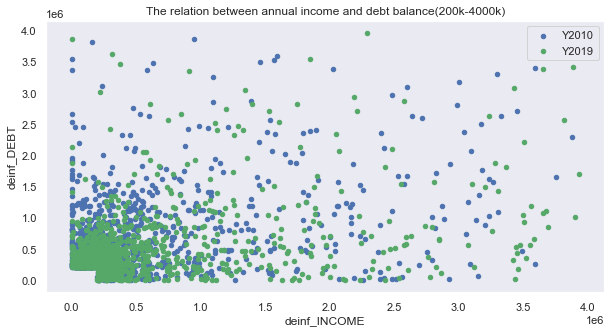

In [47]:
ax = scfp2010_byCase[((scfp2010_byCase["INCOME"]>200000) | (scfp2010_byCase["DEBT"]>200000))& ((scfp2010_byCase["DEBT"]<4000000)& (scfp2010_byCase["INCOME"]<4000000))].plot.scatter(x='INCOME', y='DEBT', color='b', label='Y2010', figsize=(10, 5), title='The relation between annual income and debt balance(200k-4000k)')
scfp2019_byCase[((scfp2019_byCase["deinf_INCOME"]>200000) | (scfp2019_byCase["deinf_DEBT"]>200000)) & ((scfp2019_byCase["deinf_DEBT"]<4000000)& (scfp2019_byCase["deinf_INCOME"]<4000000))].plot.scatter(x='deinf_INCOME', y='deinf_DEBT', color='g', label='Y2019',ax=ax, figsize=(10, 5))

To have a better visual presentation, we divided the data into two groups: those with both income and debt less than 200, and those with both income and debt less than 400 and either income or debt greater than 200, and plotted scatter plots based on their income and debt. Based on the charts, we can not see a clear correlation relationship between these two variables.

### compare debt to income ratio

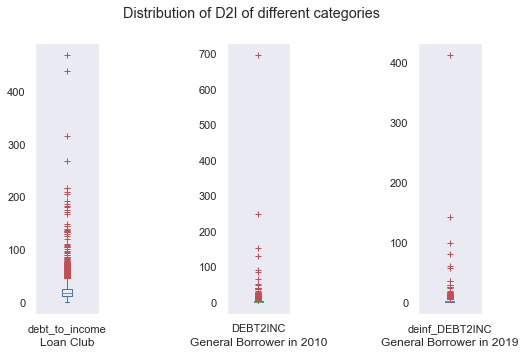

In [48]:
loan_D2I = loan["debt_to_income"]
scfp2010_D2I = scfp2010_byCase["DEBT2INC"]
scfp2019_D2I = scfp2019_byCase["deinf_DEBT2INC"]
p.draw_outliers([loan_D2I, scfp2010_D2I, scfp2019_D2I], 'Distribution of D2I of different categories')

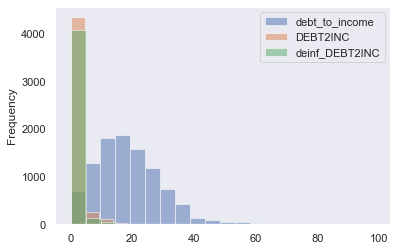

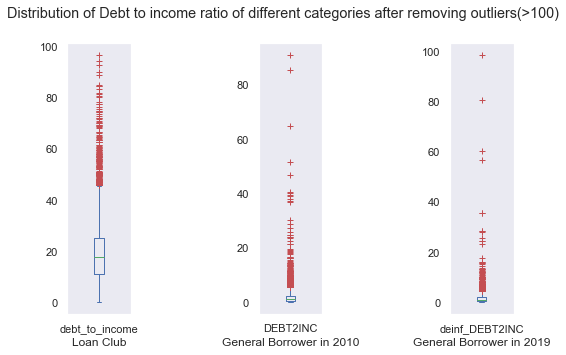

In [49]:
D2I_remove_outlier=p.remove_outlier([loan_D2I, scfp2010_D2I,scfp2019_D2I], 100)
p.draw_outliers(D2I_remove_outlier, 'Distribution of Debt to income ratio of different categories after removing outliers(>100)')

In [50]:
bins=[0,0.5,1,5,10,20,40,100, np.inf]  
labels=["<0.5","0.5-1","1-5","5-10","10-20","20-40", "40-100", ">100"]
rename_map={"debt_to_income":"loan_club", "DEBT2INC": "scfp2010", "deinf_DEBT2INC":"scfp2019"}
D2I_ratio = p.calculate_concat_ratio(loan_D2I, scfp2010_D2I, scfp2019_D2I, bins, labels, rename_map, True)
D2I_ratio

loan_club  scfp2010  scfp2019
10-20    0.380780  0.011750  0.005617
20-40    0.374849  0.003777  0.002106
5-10     0.138420  0.057491  0.036040
1-5      0.063028  0.434117  0.412591
40-100   0.030659  0.001259  0.000936
0.5-1    0.005730  0.155057  0.161479
>100     0.003317  0.000839  0.000468
<0.5     0.003217  0.335711  0.380763

<AxesSubplot:title={'center':'The proportion of Debt to Income ratio in each category'}>

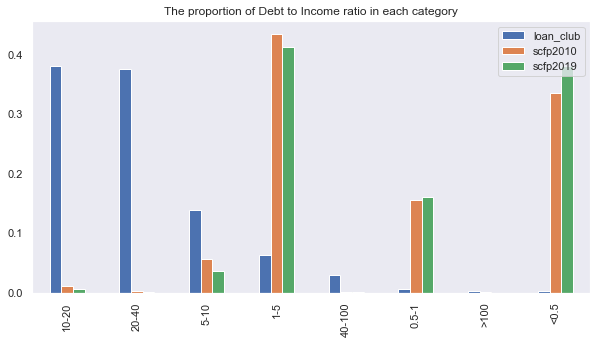

In [51]:
D2I_ratio.plot(kind="bar", title="The proportion of Debt to Income ratio in each category", figsize=(10, 5))

The chart of proportion of debt-to-income ratio shows a great difference between lending club users and general borrowers. About 40% general borrowers have a debt-to-income ratio less than 0.5, which is a healthy ratio. And about 90% general borrowers have a ratio less than 1.5. For lending club users, their debt-to-income ratio is greater than 5, the main range is betwen 10-40, which is very unhealthy. According to most commercial banks, the DTI requirement for conducting a regular conforming Loan authorization is usually 43%. This may be the reason why lending club users do not choose commercial banks for their loans. As a conclusion, lending club users have higher debt-to-income ratio, as well as worse economice situation than borrowers from all other lending resources.

### map

In [52]:
loan["state_cnt"]=loan["state"]
loan_by_state=loan.groupby("state",as_index=False)
state_income=loan_by_state.agg({"loan_amount":"sum", "state_cnt": "count"})
state_income["loan_per_case"]=state_income["loan_amount"]/state_income["state_cnt"]
state_income

state  loan_amount  state_cnt  loan_per_case
0     AK       632850         33   19177.272727
1     AL      1946550        122   15955.327869
2     AR       979775         70   13996.785714
3     AZ      4113475        255   16131.274510
4     CA     22073700       1330   16596.766917
5     CO      4020525        235   17108.617021
6     CT      3258925        181   18005.110497
7     DC       394500         19   20763.157895
8     DE       300600         24   12525.000000
9     FL     11203675        732   15305.566940
10    GA      5545300        334   16602.694611
11    HI       674500         35   19271.428571
12    ID       636950         38   16761.842105
13    IL      6776600        382   17739.790576
14    IN      2692325        178   15125.421348
15    KS      1405500         89   15792.134831
16    KY      1509475         97   15561.597938
17    LA      1631175         96   16991.406250
18    MA      3801875        237   16041.666667
19    MD      3902375        247   15799.089069
20    ME       347275         26   13356.730769
21    MI      4036700        245   16476.326531
22    MN      2769525        159   17418.396226
23    MO      2651825        159   16678.144654
24    MS      1106850         72   15372.916667
25    MT       386200         24   16091.666667
26    NC      4809225        299   16084.364548
27    ND       258500         14   18464.285714
28    NE       758825         56   13550.446429
29    NH       722225         47   15366.489362
30    NJ      5665850        338   16762.869822
31    NM       695075         43   16164.534884
32    NV      2638750        158   16700.949367
33    NY     12589650        793   15875.977301
34    OH      5434125        338   16077.292899
35    OK      1448350         81   17880.864198
36    OR      2129450        130   16380.384615
37    PA      4665825        298   15657.130872
38    RI       751375         53   14176.886792
39    SC      2613900        145   18026.896552
40    SD       308700         20   15435.000000
41    TN      2651000        167   15874.251497
42    TX     13755275        806   17066.098015
43    UT       938700         61   15388.524590
44    VA      4465225        261   17108.141762
45    VT       336775         23   14642.391304
46    WA      3860700        235   16428.510638
47    WI      2028875        128   15850.585938
48    WV       981650         68   14436.029412
49    WY       312175         19   16430.263158

In [53]:
fig = px.choropleth(state_income,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='loan_per_case',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

Hypothesis 2:
The DTI (debt to income ratio) has negative correlations to the number of years that the applicant is in the job.

In [54]:
temp = p.open_file("loans_full_schema.csv")

Temp[1] are data cols for Hypothesis 2

In [55]:
data=temp[1]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9182 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   debt_to_income  9182 non-null   float64
 1   emp_length      9182 non-null   float64
dtypes: float64(2)
memory usage: 215.2 KB


Check The Distribution of Two Sets

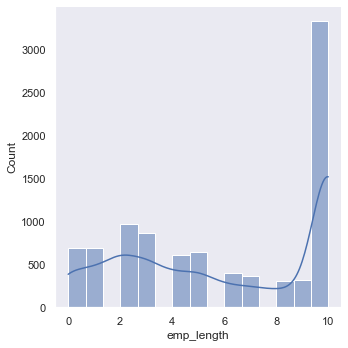

In [56]:
sns.displot(data['emp_length'], kind="hist",kde='True')

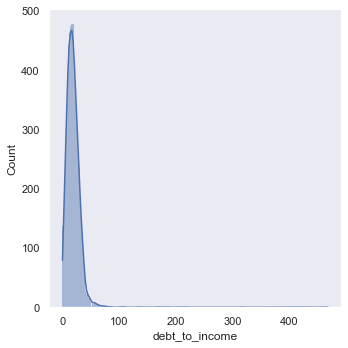

In [57]:
sns.displot(data['debt_to_income'], kind="hist",kde='True')

Too many outliers for DTI column, We decide to remove them.

<AxesSubplot:>

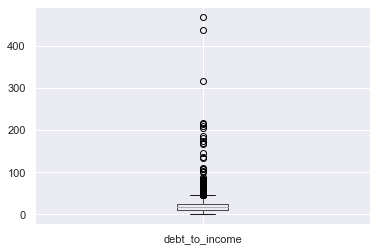

In [58]:
data[['debt_to_income']].boxplot()

<AxesSubplot:>

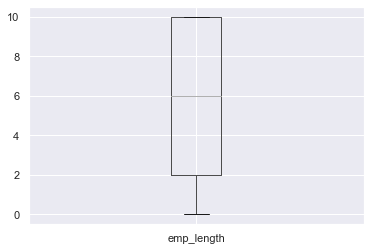

In [59]:
data[['emp_length']].boxplot()

In [60]:
data = p.delete_outliers(data,'debt_to_income')

C:\Users\gahty\PycharmProjects\2022Spring_Finals\project.py:453: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Distribution of DTI after deleting

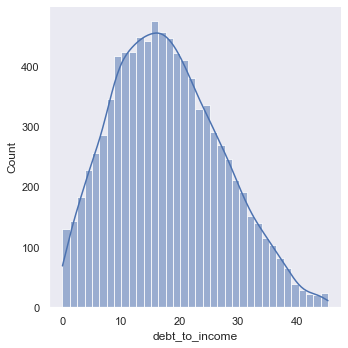

In [61]:
sns.displot(data['debt_to_income'], kind="hist",kde='True')

Output correlation is 0.06, almost no relation
P-value is less than 0.05. We can see statistically significance

In [62]:
stats.spearmanr(data['debt_to_income'], data['emp_length'])

SpearmanrResult(correlation=0.06075942621573226, pvalue=8.020194236425956e-09)

Try to calculate all relationship factors with DTI which bigger than 0.3

In [63]:
temp[0].corr(method='spearman')['debt_to_income']

emp_length                          0.057015
annual_income                      -0.196034
debt_to_income                      1.000000
annual_income_joint                -0.082224
debt_to_income_joint                0.591942
delinq_2y                          -0.039922
months_since_last_delinq            0.053911
earliest_credit_line               -0.110948
inquiries_last_12m                  0.040340
total_credit_lines                  0.307065
open_credit_lines                   0.347382
total_credit_limit                  0.217343
total_credit_utilized               0.510795
num_collections_last_12m           -0.016313
num_historical_failed_to_pay       -0.001719
months_since_90d_late               0.044564
current_accounts_delinq             0.012756
total_collection_amount_ever       -0.027936
current_installment_accounts        0.468902
accounts_opened_24m                 0.128383
months_since_last_credit_inquiry    0.029744
num_satisfactory_accounts           0.346720
num_accoun

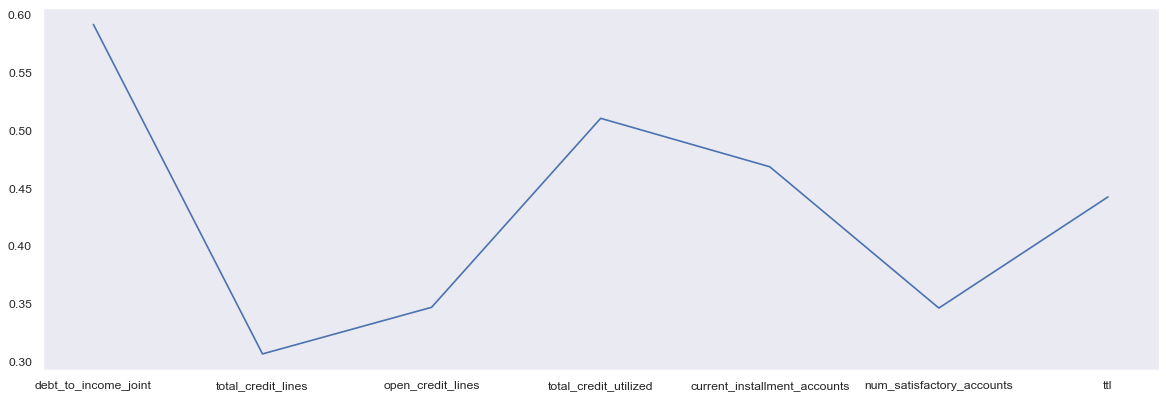

In [64]:
all=temp[0].corr(method='spearman')['debt_to_income']
for i,v in all.items():
    if v<1.0 and v>0.3 or v<-0.3 and v>-1:
        continue
    else:
        all[i]=pd.NA
all=all.dropna(axis=0, how='any')
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(all)

Get all related big factor columns and make a heart map
We can find that there are correlation between big factors.
Means we could reduce the dimension of factors in future analysis

<AxesSubplot:>

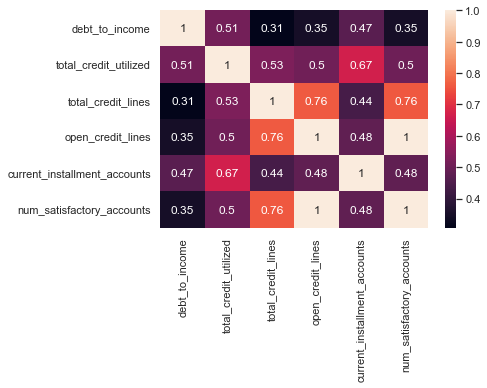

In [65]:
ndf = pd.DataFrame(temp[0], columns=['debt_to_income', 'total_credit_utilized','total_credit_lines','open_credit_lines','current_installment_accounts','num_satisfactory_accounts'])
ndf = ndf.dropna(axis=0, how='any')
sns.heatmap(ndf.corr(method='spearman'),annot=True)

Hypothesis 3: People with higher annual incomes are more likely to make repayments on time.
Unfortunately, the status of loan has different count.
This makes analysis less credible

In [66]:
h3 = pd.DataFrame(temp[0], columns=['annual_income','loan_status'])

In [67]:
h3 = h3.loc[h3['loan_status']!='Current']

Output correlation is -0.01, almost no relation
P-value is much larger than 0.05. We can not see statistically significance
People’s annual incomes are not related to whether they are likely to make repayments on time

In [68]:
stats.spearmanr(h3['annual_income'], h3['loan_status'])

SpearmanrResult(correlation=-0.010078199691841757, pvalue=0.8014608001401476)

In [69]:
h3 = p.delete_outliers(h3,'annual_income')

C:\Users\gahty\PycharmProjects\2022Spring_Finals\project.py:453: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We provide a frequency map though different type of loan_status
We can find even they have unbalanced count, the peek of each line is located at almost same place
It proves that annual incomes are not related to loan status (whether people make repayment on time)

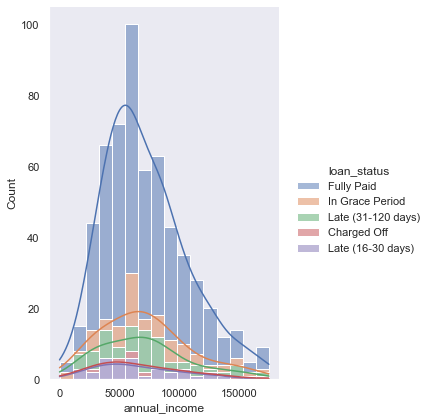

In [70]:
sns.displot(h3, kind="hist",x="annual_income",kde='True',hue='loan_status',multiple="stack",height=6, aspect=.7)